# Car Price Prediction

You should choose one of the two versions for this homework, you don't have to do both of them!

## VERSION 1:

Use the following dataset from Kaggle: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

Dataset: CAR DETAILS FROM CAR DEKHO.csv

1. Read the data.
2. Preprocess, clean the data.
3. Use EDA techniques to analyze the data.
5. Create regression models and some sort of hyperparameter optimization (Bayesian Optimizer, Random search, grid search)
6. Evaluate the models using proper evaluation metrics
7. Showcase the best variant of each algorithm in a table

## VERSION 2:

Dataset: car.data
Dataset description: car.c45-names

1. Read the data.
2. Preprocess, clean the data.
3. Use EDA techniques to analyze the data.
4. Create classification models and some sort of hyperparameter optimization (Bayesian Optimizer, Random search, grid search)
5. Create regression models and some sort of hyperparameter optimization (Bayesian Optimizer, Random search, grid search)
6. Evaluate the models using proper evaluation metrics
7. Showcase the best variant of each algorithm in a table


In [159]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt

###Read, preprocess

In [160]:
df = pd.read_csv('car.data', header=None)

print(df.head())

       0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc


In [161]:
column_names = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class']

df.columns = column_names

print(df)

     Buying  Maint  Doors Persons Lug_boot Safety  Class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]


In [162]:
df.isnull().sum()

,0
Buying,0
Maint,0
Doors,0
Persons,0
Lug_boot,0
Safety,0
Class,0


In [163]:
le = LabelEncoder()

In [164]:
df['Doors'] = df['Doors'].replace('5more', '5').astype(int)
df['Persons'] = df['Persons'].replace('more', '5').astype(int)

In [165]:
categorical_columns = ['Buying', 'Maint', 'Lug_boot', 'Safety', 'Class']  # Including 'Class' (target)

for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

print(df.head())

   Buying  Maint  Doors  Persons  Lug_boot  Safety  Class
0       3      3      2        2         2       1      2
1       3      3      2        2         2       2      2
2       3      3      2        2         2       0      2
3       3      3      2        2         1       1      2
4       3      3      2        2         1       2      2


In [166]:
X = df.drop('Class', axis=1) #features
y = df['Class'] #target

###EDA

In [167]:
print(df.describe())

            Buying        Maint        Doors      Persons     Lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      1.500000     1.500000     3.500000     3.666667     1.000000   
std       1.118358     1.118358     1.118358     1.247580     0.816733   
min       0.000000     0.000000     2.000000     2.000000     0.000000   
25%       0.750000     0.750000     2.750000     2.000000     0.000000   
50%       1.500000     1.500000     3.500000     4.000000     1.000000   
75%       2.250000     2.250000     4.250000     5.000000     2.000000   
max       3.000000     3.000000     5.000000     5.000000     2.000000   

            Safety        Class  
count  1728.000000  1728.000000  
mean      1.000000     1.553241  
std       0.816733     0.875948  
min       0.000000     0.000000  
25%       0.000000     1.000000  
50%       1.000000     2.000000  
75%       2.000000     2.000000  
max       2.000000     3.000000  


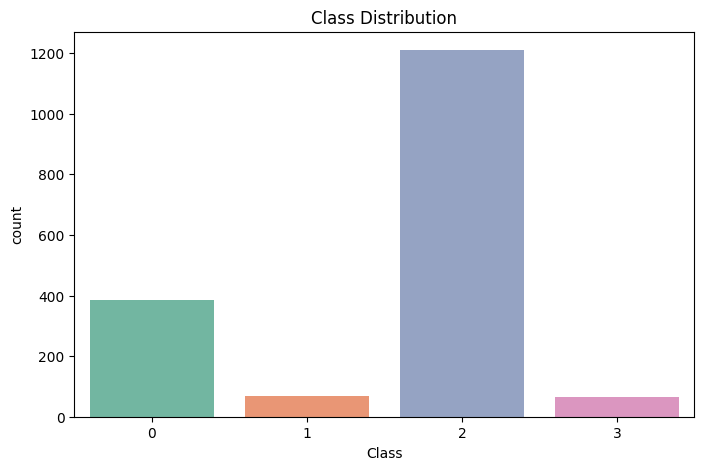

In [168]:
#Class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Class', hue='Class', palette='Set2', legend=False)
plt.title('Class Distribution')
plt.show()

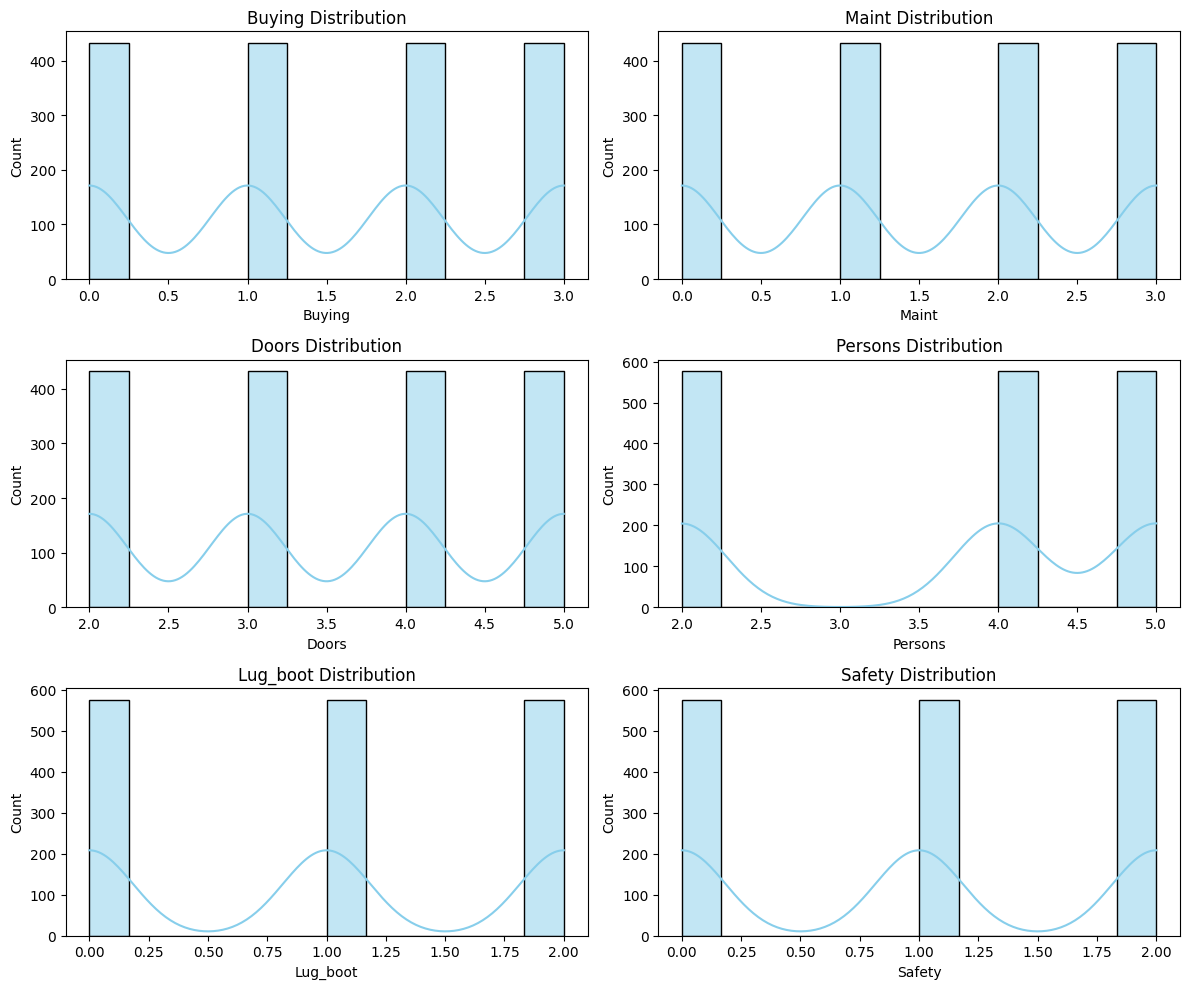

In [169]:
#Feature distribution
plt.figure(figsize=(12, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(X[column], kde=True, color='skyblue')
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()

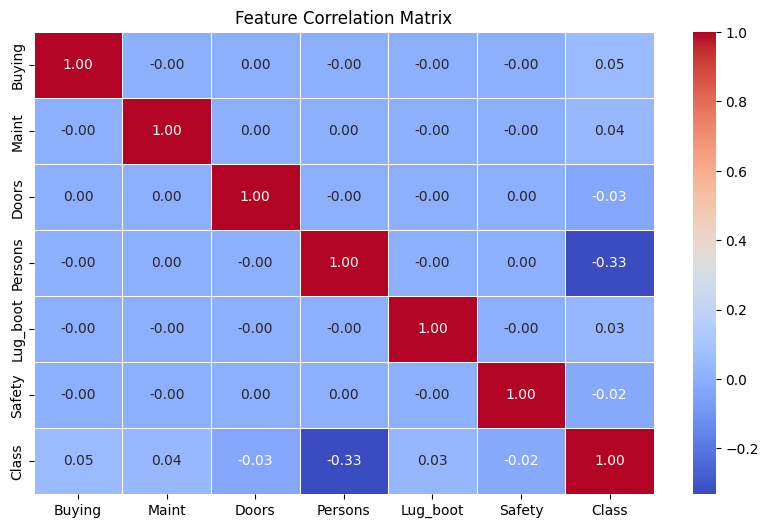

In [170]:
#Correlation heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

###Create classification models and some sort of hyperparameter optimization (Bayesian Optimizer, Random search, grid search)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
X_train.shape[0]

1209

In [173]:
X_test.shape[0]

519

In [174]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [175]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [176]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    print(f'{model_name} Accuracy: {score:.4f}')

Logistic Regression Accuracy: 0.6647
Decision Tree Accuracy: 0.9595
Random Forest Accuracy: 0.9711
SVM Accuracy: 0.9249


In [177]:
#define parameters for each model
param_grids = {
   'Logistic Regression': {
        'C': np.logspace(-4, 4, 20),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

#perform RandomizedSearchCV on each model
def optimize_model(model_name, model, param_grid):
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)
    random_search.fit(X_train_scaled, y_train)

    print(f'Best parameters for {model_name}: {random_search.best_params_}')
    print(f'Best Cross-Validation score for {model_name}: {random_search.best_score_:.4f}')

    best_model = random_search.best_estimator_
    test_predictions = best_model.predict(X_test_scaled)

    test_accuracy = accuracy_score(y_test, test_predictions)

    print(f'{model_name} Test Accuracy: {test_accuracy:.4f}\n')

    return best_model, random_search.best_params_, test_accuracy

#apply RandomizedSearchCV to all models
best_models = {}
for model_name, model in models.items():
    print(f"Optimizing {model_name}...\n")
    best_model, best_params, test_accuracy = optimize_model(model_name, model, param_grids[model_name])

    best_models[model_name] = {
        'Best Hyperparameters': best_params,
        'Test Accuracy': test_accuracy
    }

results_df = pd.DataFrame.from_dict(best_models, orient='index')

#display the results as a table
print("\nBest Models and Metrics:\n")
print(results_df)

Optimizing Logistic Regression...

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': np.float64(0.0006951927961775605)}
Best Cross-Validation score for Logistic Regression: 0.7080
Logistic Regression Test Accuracy: 0.6840

Optimizing Decision Tree...

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 40}
Best Cross-Validation score for Decision Tree: 0.9653
Decision Tree Test Accuracy: 0.9557

Optimizing Random Forest...

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Best Cross-Validation score for Random Forest: 0.9710
Random Forest Test Accuracy: 0.9692

Optimizing SVM...

Fitting 5 folds for each of 10 cand

###Create regression models and some sort of hyperparameter optimization (Bayesian Optimizer, Random search, grid search)

In [178]:
#Random Search
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False],
        'positive': [True, False]
    },
    'Decision Tree Regressor': {
        'max_depth': [10, 20, 30, 40, 50, 60],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'max_features': [None, 'sqrt', 'log2']
    },
    'Random Forest Regressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
}

best_models_random_search = {}

#perform RandomizedSearchCV on each model
for model_name, model in models.items():
    print(f"Optimizing {model_name}...\n")

    random_search = RandomizedSearchCV(model, param_grids[model_name], cv=3, n_jobs=-1, n_iter=4)
    random_search.fit(X_train_scaled, y_train)

    best_models_random_search[model_name] = {
        'Best Hyperparameters': random_search.best_params_,
        'Test MSE': mean_squared_error(y_test, random_search.best_estimator_.predict(X_test_scaled)),
        'Test R^2': r2_score(y_test, random_search.best_estimator_.predict(X_test_scaled))
    }

    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Test Mean Squared Error for {model_name}: {best_models_random_search[model_name]['Test MSE']}")
    print(f"Test R^2 for {model_name}: {best_models_random_search[model_name]['Test R^2']}")
    print("-" * 40)

results_df = pd.DataFrame.from_dict(best_models_random_search, orient='index')

#display the results as a table
print("\nBest Models and Metrics:\n")
print(results_df)

Optimizing Linear Regression...

Best parameters for Linear Regression: {'positive': False, 'fit_intercept': True}
Test Mean Squared Error for Linear Regression: 0.7159049184757227
Test R^2 for Linear Regression: 0.0985730224493786
----------------------------------------
Optimizing Decision Tree Regressor...

Best parameters for Decision Tree Regressor: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}
Test Mean Squared Error for Decision Tree Regressor: 0.07037452103513211
Test R^2 for Decision Tree Regressor: 0.9113883839094995
----------------------------------------
Optimizing Random Forest Regressor...

Best parameters for Random Forest Regressor: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
Test Mean Squared Error for Random Forest Regressor: 0.10760204195132357
Test R^2 for Random Forest Regressor: 0.8645135953794316
----------------------------------------

Best Models and Metrics:

In [179]:
best_models_grid = {}

#perform GridSearchCV on each model
for model_name, model in models.items():
    print(f"Optimizing {model_name}...\n")

    grid_search =  GridSearchCV(model, param_grids[model_name], cv=3, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_models_grid[model_name] = {
        'Best Hyperparameters': grid_search.best_params_,
        'Test MSE': mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test_scaled)),
        'Test R^2': r2_score(y_test, grid_search.best_estimator_.predict(X_test_scaled))
    }

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Test Mean Squared Error for {model_name}: {best_models_grid[model_name]['Test MSE']}")
    print(f"Test R^2 for {model_name}: {best_models_grid[model_name]['Test R^2']}")
    print("-" * 40)

results_df = pd.DataFrame.from_dict(best_models_grid, orient='index')

#display the results as a table
print("\nBest Models and Metrics:\n")
print(results_df)

Optimizing Linear Regression...

Best parameters for Linear Regression: {'fit_intercept': True, 'positive': False}
Test Mean Squared Error for Linear Regression: 0.7159049184757227
Test R^2 for Linear Regression: 0.0985730224493786
----------------------------------------
Optimizing Decision Tree Regressor...

Best parameters for Decision Tree Regressor: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Mean Squared Error for Decision Tree Regressor: 0.07133791217193365
Test R^2 for Decision Tree Regressor: 0.9101753362851096
----------------------------------------
Optimizing Random Forest Regressor...

Best parameters for Random Forest Regressor: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Mean Squared Error for Random Forest Regressor: 0.09055915221579963
Test R^2 for Random Forest Regressor: 0.8859730380882931
----------------------------------------

Best Models and Metric